#### Preliminaries for data processing and analysis

In [1]:
%matplotlib inline
import numpy as np
import pandas

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)

from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.cross_validation import cross_val_score,LeaveOneOut,ShuffleSplit
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import scale
from sklearn.multiclass import OneVsRestClassifier,OneVsOneClassifier,OutputCodeClassifier

import scratch as s

## Brittany's data, with demented

In [2]:
kind = 'dugger'
exclude_subjects = {}
options = ['gender','demented','expired_age']

# First the individual responses.  
X_responses,ctrl = s.get_response_matrix(kind, options=['responses']+options, exclude_subjects=exclude_subjects)
s.summarize(X_responses,ctrl)

# Then the total correct.  
X_total_correct,ctrl = s.get_response_matrix(kind, options=['total_correct']+options, exclude_subjects=exclude_subjects)
# Add a column of ones to allow fitting.  
X_total_correct = np.hstack((X_total_correct,np.ones((X_total_correct.shape[0],1)))) 
s.summarize(X_total_correct,ctrl)

ctrl = np.array(ctrl)
n_ctrl = ctrl.sum()

The loaded matrix has shape (92 x 162), and there are 69 controls
The loaded matrix has shape (92 x 4), and there are 69 controls


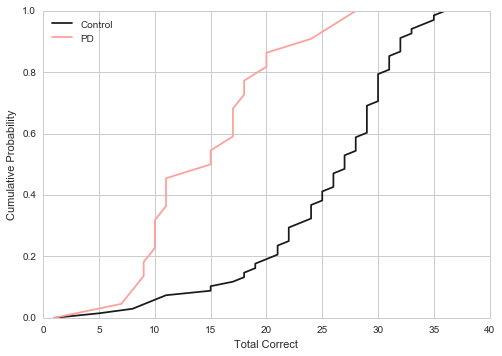

In [3]:
s.plot_total_correct_cumul(X_total_correct,ctrl)

In [4]:
loo = LeaveOneOut(len(ctrl))
mnb = MultinomialNB(alpha=0.1,fit_prior=False)
Y = ctrl

s.cross_validate(mnb,X_total_correct,Y,loo,"'Total Correct'")
s.cross_validate(mnb,X_responses,Y,loo,"'All responses'")

Cross-validation accuracy for 'Total Correct' is 0.750
Cross-validation accuracy for 'All responses' is 0.902


In [5]:
p_parks_responses_mnb = s.get_p_parks(mnb,loo,X_responses,Y); 
p_parks_total_correct = s.get_p_parks(mnb,loo,X_total_correct,Y);

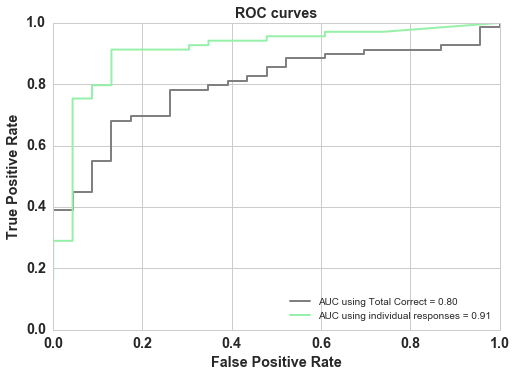

In [6]:
s.plot_roc_curve(Y,p_parks_total_correct,p_parks_responses_mnb)

# Brittany's data, without demented

In [8]:
kind = 'dugger'
exclude_subjects = {'demented':True}
options = ['gender','expired_age']

# First the individual responses.  
X_responses,ctrl = s.get_response_matrix(kind, options=['responses']+options, exclude_subjects=exclude_subjects)
s.summarize(X_responses,ctrl)

# Then the total correct.  
X_total_correct,ctrl = s.get_response_matrix(kind, options=['total_correct']+options, exclude_subjects=exclude_subjects)
# Add a column of ones to allow fitting.  
X_total_correct = np.hstack((X_total_correct,np.ones((X_total_correct.shape[0],1)))) 
s.summarize(X_total_correct,ctrl)

ctrl = np.array(ctrl)
n_ctrl = ctrl.sum()

The loaded matrix has shape (81 x 162), and there are 69 controls
The loaded matrix has shape (81 x 4), and there are 69 controls


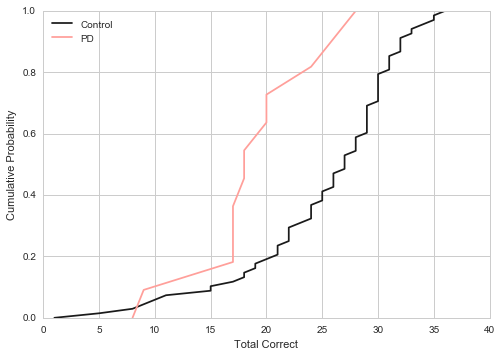

In [11]:
s.plot_total_correct_cumul(X_total_correct,ctrl)

In [12]:
loo = LeaveOneOut(len(ctrl))
mnb = MultinomialNB(alpha=0.1,fit_prior=False)
Y = ctrl

s.cross_validate(mnb,X_total_correct,Y,loo,"'Total Correct'")
s.cross_validate(mnb,X_responses,Y,loo,"'All responses'")

Cross-validation accuracy for 'Total Correct' is 0.667
Cross-validation accuracy for 'All responses' is 0.889


In [13]:
p_parks_responses_mnb = s.get_p_parks(mnb,loo,X_responses,Y); 
p_parks_total_correct = s.get_p_parks(mnb,loo,X_total_correct,Y);

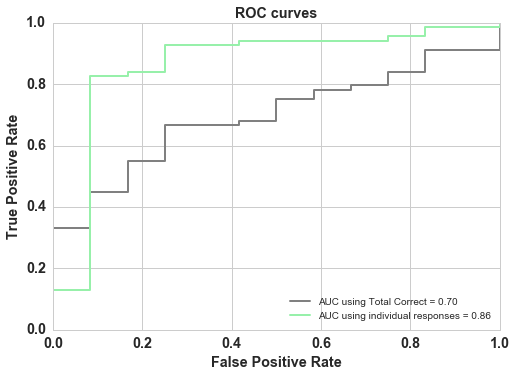

In [14]:
s.plot_roc_curve(Y,p_parks_total_correct,p_parks_responses_mnb)

## Joe's data, with demented
## Joe's data contains many other categories so ctrl vs non-ctrl is not a very good distinction.  

In [23]:
kind = 'hentz'
exclude_subjects = {}
options = ['gender','demented','expired_age']

# First the individual responses.  
X_responses,ctrl = s.get_response_matrix(kind, options=['responses']+options, exclude_subjects=exclude_subjects)
s.summarize(X_responses,ctrl)

# Then the total correct.  
X_total_correct,ctrl = s.get_response_matrix(kind, options=['total_correct']+options, exclude_subjects=exclude_subjects)
# Add a column of ones to allow fitting.  
X_total_correct = np.hstack((X_total_correct,np.ones((X_total_correct.shape[0],1)))) 
s.summarize(X_total_correct,ctrl)

ctrl = np.array(ctrl)
n_ctrl = ctrl.sum()

The loaded matrix has shape (197 x 162), and there are 57 controls
The loaded matrix has shape (197 x 4), and there are 57 controls


In [25]:
s.get_labels('hentz').shape

(197, 18)

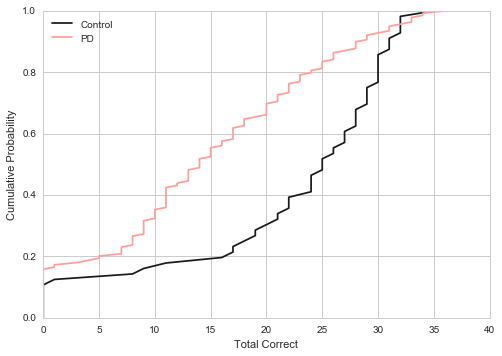

In [17]:
s.plot_total_correct_cumul(X_total_correct,ctrl)

In [18]:
loo = LeaveOneOut(len(ctrl))
mnb = MultinomialNB(alpha=0.1,fit_prior=False)
Y = ctrl

s.cross_validate(mnb,X_total_correct,Y,loo,"'Total Correct'")
s.cross_validate(mnb,X_responses,Y,loo,"'All responses'")

Cross-validation accuracy for 'Total Correct' is 0.640
Cross-validation accuracy for 'All responses' is 0.690


In [19]:
p_parks_responses_mnb = s.get_p_parks(mnb,loo,X_responses,Y); 
p_parks_total_correct = s.get_p_parks(mnb,loo,X_total_correct,Y);

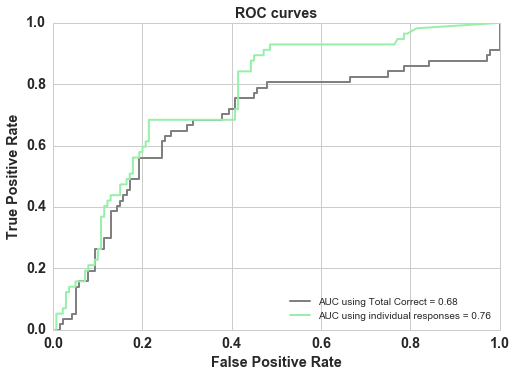

In [20]:
s.plot_roc_curve(Y,p_parks_total_correct,p_parks_responses_mnb)